# Wczytanie pliku

In [9]:
import os
print("Katalog roboczy:", os.getcwd())


Katalog roboczy: C:\Users\PabloPapito\PythonWAnalizieDanych\DayTwo\cwiczenia


In [11]:
print("Pliki w katalogu roboczym:", os.listdir())


Pliki w katalogu roboczym: ['.ipynb_checkpoints', 'CwiczeniaAnaliza - Rozwiazania.ipynb', 'CwiczeniaAnaliza.ipynb', 'Warsztat - analiza pliku.ipynb']


In [17]:
import pandas as pd

# Wczytaj dane
file_path = '../top_100_world_university_2024_new.csv'
universities_data = pd.read_csv(file_path)

# Wyświetl pierwsze kilka wierszy danych
universities_data.head()


,sequence,rank,university,overall_score,academic_reputation,employer_reputation,faculty_student_ratio,citations_per_faculty,international_faculty_ratio,international_students_ratio,international_research_network,employment_outcomes,sustainability,Fundos (US$)
0,0,1,Massachusetts Institute of Technology (MIT),100.0,100.0,100.0,100.0,100.0,100.0,88.2,94.3,100.0,95.2,9.2
1,1,2,University of Cambridge,99.2,100.0,100.0,100.0,92.3,100.0,95.8,99.9,100.0,97.3,7.8
2,2,3,University of Oxford,98.9,100.0,100.0,100.0,90.6,98.2,98.2,100.0,100.0,97.8,6.7
3,3,4,Harvard University,98.3,100.0,100.0,98.3,100.0,84.6,66.8,100.0,100.0,96.7,6.3
4,4,5,Stanford University,98.1,100.0,100.0,100.0,99.9,99.9,51.2,95.8,100.0,94.4,6.2


# Podstawowe Atrybuty DataFrame w Pandas

In [20]:
# Kształt danych: liczba wierszy i kolumn
print("Kształt danych:", universities_data.shape)

# Nazwy kolumn
print("\nKolumny:")
print(universities_data.columns)

# Typy danych
print("\nTypy danych:")
print(universities_data.dtypes)

# Sprawdzanie brakujących wartości
print("\nBrakujące wartości:")
print(universities_data.isnull().sum()) # Liczy brakujące wartości w każdej kolumnie, co pomaga ocenić jakość danych.


Kształt danych: (105, 14)

Kolumny:
Index(['sequence', 'rank', 'university', 'overall_score',
       'academic_reputation', 'employer_reputation', 'faculty_student_ratio',
       'citations_per_faculty', 'international_faculty_ratio',
       'international_students_ratio', 'international_research_network',
       'employment_outcomes', 'sustainability', 'Fundos (US$)'],
      dtype='object')

Typy danych:
sequence                            int64
rank                                int64
university                         object
overall_score                     float64
academic_reputation               float64
employer_reputation               float64
faculty_student_ratio             float64
citations_per_faculty             float64
international_faculty_ratio       float64
international_students_ratio      float64
international_research_network    float64
employment_outcomes               float64
sustainability                    float64
Fundos (US$)                       object
dty

# Przydatne funckje w Pandas

In [26]:
# 1. Podgląd pierwszych kilku wierszy
print("Pierwsze 5 wierszy:")
print(universities_data.head())

# 2. Podgląd ostatnich kilku wierszy
print("\nOstatnie 5 wierszy:")
print(universities_data.tail())

# 3. Rozkład wartości w konkretnej kolumnie (np. rank) - wskazuje ilość wystąpień
print("\nRozkład wartości w kolumnie 'rank':")
print(universities_data['rank'].value_counts().sort_index())

# 4. Unikalne wartości w kolumnie
print("\nUnikalne wartości w kolumnie 'rank':")
print(universities_data['rank'].unique())

# 5. Posortowanie danych według kolumny (np. 'overall_score')
print("\nDane posortowane według 'overall_score':")
print(universities_data.sort_values(by='overall_score', ascending=False).head(10))

# 6. Dodanie nowej kolumny (np. Normalizacja wskaźnika 'overall_score')
universities_data['normalized_score'] = universities_data['overall_score'] / 100
print("\nDane z nową kolumną 'normalized_score':")
print(universities_data.head())

# ^ W tym przypadku overall_score, który pierwotnie jest na skali od 0 do 100, jest przekształcany na skalę od 0 do 1.
# Dzięki temu możemy łatwiej porównywać wyniki między uczelniami, zwłaszcza w połączeniu z innymi wskaźnikami.

# 7. Grupowanie danych (np. średni 'overall_score' dla grup rank)
grouped_data = universities_data.groupby('rank')['overall_score'].mean()
print("\nŚrednia całkowita ocena dla każdej grupy rank:")
print(grouped_data)


Pierwsze 5 wierszy:
   sequence  rank                                   university  overall_score  \
0         0     1  Massachusetts Institute of Technology (MIT)          100.0   
1         1     2                      University of Cambridge           99.2   
2         2     3                         University of Oxford           98.9   
3         3     4                           Harvard University           98.3   
4         4     5                          Stanford University           98.1   

   academic_reputation  employer_reputation  faculty_student_ratio  \
0                100.0                100.0                  100.0   
1                100.0                100.0                  100.0   
2                100.0                100.0                  100.0   
3                100.0                100.0                   98.3   
4                100.0                100.0                  100.0   

   citations_per_faculty  international_faculty_ratio  \
0              

# Czyszczenie Wartości Zduplikowanych w Pandas

In [30]:
# 1. Sprawdzanie liczby zduplikowanych wierszy
print("Liczba zduplikowanych wierszy:", universities_data.duplicated().sum())

# 2. Wyświetlenie zduplikowanych wierszy (jeśli istnieją)
duplicates = universities_data[universities_data.duplicated()]
print("\nZduplikowane wiersze:")
print(duplicates)

# 3. Usunięcie zduplikowanych wierszy - nalezy przypisać drop_duplicates do zmiennej aby zaktualizować dane
universities_data_cleaned = universities_data.drop_duplicates()

# 4. Sprawdzenie nowej liczby wierszy
print("\nLiczba wierszy po usunięciu duplikatów:", universities_data_cleaned.shape[0])


Liczba zduplikowanych wierszy: 0

Zduplikowane wiersze:
Empty DataFrame
Columns: [sequence, rank, university, overall_score, academic_reputation, employer_reputation, faculty_student_ratio, citations_per_faculty, international_faculty_ratio, international_students_ratio, international_research_network, employment_outcomes, sustainability, Fundos (US$), normalized_score]
Index: []

Liczba wierszy po usunięciu duplikatów: 105


# Wartości Brakujące - Różne Podejścia do Radzenia Sobie z Nimi w Pandas

In [32]:
# 1. Sprawdzanie liczby brakujących wartości w każdej kolumnie
print("Brakujące wartości w każdej kolumnie:")
print(universities_data.isnull().sum())

# 2. Usuwanie wierszy z brakującymi wartościami
data_dropped_na = universities_data.dropna()
print("\nDane po usunięciu wierszy z brakującymi wartościami:")
print(data_dropped_na.shape)

# inplace:

# Jeśli ustawisz True, operacja zostanie wykonana na oryginalnym obiekcie, a funkcja nie zwróci nowego obiektu.
# Jeśli pozostawisz domyślną wartość (False), zwrócony zostanie nowy obiekt DataFrame, a oryginał pozostanie niezmieniony.
# Zwracana wartość:
# Zwraca nowy DataFrame (jeśli inplace=False) z wierszami lub kolumnami usuniętymi zgodnie z określonymi kryteriami.

# 3. Usuwanie kolumn z brakującymi wartościami
data_dropped_cols = universities_data.dropna(axis=1)
print("\nDane po usunięciu kolumn z brakującymi wartościami:")
print(data_dropped_cols.shape)

# 4. Uzupełnianie brakujących wartości stałą (np. 0)
data_filled_constant = universities_data.fillna(0)
print("\nDane po uzupełnieniu braków wartością 0:")
print(data_filled_constant.head())

# 5. Uzupełnianie brakujących wartości średnią kolumny (przykład dla kolumny 'overall_score')
if universities_data['overall_score'].isnull().any():
    mean_score = universities_data['overall_score'].mean()
    universities_data['overall_score'] = universities_data['overall_score'].fillna(mean_score)
    print("\nDane po uzupełnieniu braków średnią dla 'overall_score':")
    print(universities_data.head())

# 6. Sprawdzenie, czy brakujące wartości zostały usunięte
print("\nCzy pozostały brakujące wartości?")
print(universities_data.isnull().sum())


Brakujące wartości w każdej kolumnie:
sequence                          0
rank                              0
university                        0
overall_score                     0
academic_reputation               0
employer_reputation               0
faculty_student_ratio             0
citations_per_faculty             0
international_faculty_ratio       0
international_students_ratio      0
international_research_network    0
employment_outcomes               0
sustainability                    0
Fundos (US$)                      0
normalized_score                  0
dtype: int64

Dane po usunięciu wierszy z brakującymi wartościami:
(105, 15)

Dane po usunięciu kolumn z brakującymi wartościami:
(105, 15)

Dane po uzupełnieniu braków wartością 0:
   sequence  rank                                   university  overall_score  \
0         0     1  Massachusetts Institute of Technology (MIT)          100.0   
1         1     2                      University of Cambridge           99.2 

# Sortowanie Danych w Pandas

#### Sortowanie według wartości w jednej kolumnie

In [35]:
# Sortowanie według kolumny 'overall_score' rosnąco
sorted_data = universities_data.sort_values(by='overall_score')
print("\nDane posortowane według 'overall_score' (rosnąco):")
print(sorted_data.head())



Dane posortowane według 'overall_score' (rosnąco):
     sequence  rank                                         university  \
104       104   105                                 Uppsala University   
103       103   104                        The University of Sheffield   
102       102   103     Pontificia Universidad CatÃ³lica de Chile (UC)   
101       101   102                    University of Wisconsin-Madison   
99         99   100  Pohang University of Science And Technology (P...   

     overall_score  academic_reputation  employer_reputation  \
104           59.4                 62.7                 30.5   
103           59.7                 58.7                 52.3   
102           59.9                 92.9                 99.5   
101           60.0                 80.2                 47.8   
99            60.4                 51.6                 75.9   

     faculty_student_ratio  citations_per_faculty  \
104                   47.7                   45.6   
103         

In [37]:
# Sortowanie według kolumny 'overall_score' malejąco
sorted_data_desc = universities_data.sort_values(by='overall_score', ascending=False)
print("\nDane posortowane według 'overall_score' (malejąco):")
print(sorted_data_desc.head())



Dane posortowane według 'overall_score' (malejąco):
   sequence  rank                                   university  overall_score  \
0         0     1  Massachusetts Institute of Technology (MIT)          100.0   
1         1     2                      University of Cambridge           99.2   
2         2     3                         University of Oxford           98.9   
3         3     4                           Harvard University           98.3   
4         4     5                          Stanford University           98.1   

   academic_reputation  employer_reputation  faculty_student_ratio  \
0                100.0                100.0                  100.0   
1                100.0                100.0                  100.0   
2                100.0                100.0                  100.0   
3                100.0                100.0                   98.3   
4                100.0                100.0                  100.0   

   citations_per_faculty  international

#### Sortowanie według wielu kolumn

In [39]:
# Sortowanie według 'rank' (rosnąco) i 'overall_score' (malejąco)
sorted_multi = universities_data.sort_values(by=['rank', 'overall_score'], ascending=[True, False])
print("\nDane posortowane według 'rank' (rosnąco) i 'overall_score' (malejąco):")
print(sorted_multi.head())



Dane posortowane według 'rank' (rosnąco) i 'overall_score' (malejąco):
   sequence  rank                                   university  overall_score  \
0         0     1  Massachusetts Institute of Technology (MIT)          100.0   
1         1     2                      University of Cambridge           99.2   
2         2     3                         University of Oxford           98.9   
3         3     4                           Harvard University           98.3   
4         4     5                          Stanford University           98.1   

   academic_reputation  employer_reputation  faculty_student_ratio  \
0                100.0                100.0                  100.0   
1                100.0                100.0                  100.0   
2                100.0                100.0                  100.0   
3                100.0                100.0                   98.3   
4                100.0                100.0                  100.0   

   citations_per_fac

#### Sortowanie według indeksów

In [41]:
# Sortowanie według indeksu rosnąco
sorted_index = universities_data.sort_index()
print("\nDane posortowane według indeksu (rosnąco):")
print(sorted_index.head())

# Sortowanie według indeksu malejąco
sorted_index_desc = universities_data.sort_index(ascending=False)
print("\nDane posortowane według indeksu (malejąco):")
print(sorted_index_desc.head())



Dane posortowane według indeksu (rosnąco):
   sequence  rank                                   university  overall_score  \
0         0     1  Massachusetts Institute of Technology (MIT)          100.0   
1         1     2                      University of Cambridge           99.2   
2         2     3                         University of Oxford           98.9   
3         3     4                           Harvard University           98.3   
4         4     5                          Stanford University           98.1   

   academic_reputation  employer_reputation  faculty_student_ratio  \
0                100.0                100.0                  100.0   
1                100.0                100.0                  100.0   
2                100.0                100.0                  100.0   
3                100.0                100.0                   98.3   
4                100.0                100.0                  100.0   

   citations_per_faculty  international_faculty_

# Filtrowanie Danych w Pandas przy użyciu różnych metod

#### LOC

In [43]:
# Filtrowanie wierszy, gdzie całkowita ocena ('overall_score') jest większa niż 90
filtered_loc = universities_data.loc[universities_data['overall_score'] > 90]
print("\nFiltrowanie za pomocą loc (overall_score > 90):")
print(filtered_loc)



Filtrowanie za pomocą loc (overall_score > 90):
    sequence  rank                                   university  \
0          0     1  Massachusetts Institute of Technology (MIT)   
1          1     2                      University of Cambridge   
2          2     3                         University of Oxford   
3          3     4                           Harvard University   
4          4     5                          Stanford University   
5          5     6                      Imperial College London   
6          6     7                                   ETH Zurich   
7          7     8       National University of Singapore (NUS)   
8          8     9                                          UCL   
9          9    10     University of California, Berkeley (UCB)   
10        10    11                        University of Chicago   

    overall_score  academic_reputation  employer_reputation  \
0           100.0                100.0                100.0   
1            99.2   

#### ILOC

In [45]:
# Wybranie pierwszych 5 wierszy i kolumn 0-3
filtered_iloc = universities_data.iloc[:5, :4]
print("\nFiltrowanie za pomocą iloc (pierwsze 5 wierszy i 4 kolumny):")
print(filtered_iloc)



Filtrowanie za pomocą iloc (pierwsze 5 wierszy i 4 kolumny):
   sequence  rank                                   university  overall_score
0         0     1  Massachusetts Institute of Technology (MIT)          100.0
1         1     2                      University of Cambridge           99.2
2         2     3                         University of Oxford           98.9
3         3     4                           Harvard University           98.3
4         4     5                          Stanford University           98.1


#### QUERY

In [47]:
# Filtrowanie wierszy, gdzie 'rank' jest mniejsze niż 10
filtered_query = universities_data.query("rank < 10")
print("\nFiltrowanie za pomocą query (rank < 10):")
print(filtered_query)



Filtrowanie za pomocą query (rank < 10):
   sequence  rank                                   university  overall_score  \
0         0     1  Massachusetts Institute of Technology (MIT)          100.0   
1         1     2                      University of Cambridge           99.2   
2         2     3                         University of Oxford           98.9   
3         3     4                           Harvard University           98.3   
4         4     5                          Stanford University           98.1   
5         5     6                      Imperial College London           97.8   
6         6     7                                   ETH Zurich           93.3   
7         7     8       National University of Singapore (NUS)           92.7   
8         8     9                                          UCL           92.4   

   academic_reputation  employer_reputation  faculty_student_ratio  \
0                100.0                100.0                  100.0   
1      

#### WHERE

In [49]:
# Wiersze, gdzie 'academic_reputation' jest większe niż 90, reszta jako NaN
filtered_where = universities_data.where(universities_data['academic_reputation'] > 90)
print("\nFiltrowanie za pomocą where (academic_reputation > 90):")
print(filtered_where)



Filtrowanie za pomocą where (academic_reputation > 90):
     sequence   rank                                      university  \
0         0.0    1.0     Massachusetts Institute of Technology (MIT)   
1         1.0    2.0                         University of Cambridge   
2         2.0    3.0                            University of Oxford   
3         3.0    4.0                              Harvard University   
4         4.0    5.0                             Stanford University   
..        ...    ...                                             ...   
100       NaN    NaN                                             NaN   
101       NaN    NaN                                             NaN   
102     102.0  103.0  Pontificia Universidad CatÃ³lica de Chile (UC)   
103       NaN    NaN                                             NaN   
104       NaN    NaN                                             NaN   

     overall_score  academic_reputation  employer_reputation  \
0            1

#### ISIN

In [51]:
# Wiersze, gdzie 'rank' jest równy 1, 2 lub 3
filtered_isin = universities_data[universities_data['rank'].isin([1, 2, 3])]
print("\nFiltrowanie za pomocą isin (rank = 1, 2, 3):")
print(filtered_isin)



Filtrowanie za pomocą isin (rank = 1, 2, 3):
   sequence  rank                                   university  overall_score  \
0         0     1  Massachusetts Institute of Technology (MIT)          100.0   
1         1     2                      University of Cambridge           99.2   
2         2     3                         University of Oxford           98.9   

   academic_reputation  employer_reputation  faculty_student_ratio  \
0                100.0                100.0                  100.0   
1                100.0                100.0                  100.0   
2                100.0                100.0                  100.0   

   citations_per_faculty  international_faculty_ratio  \
0                  100.0                        100.0   
1                   92.3                        100.0   
2                   90.6                         98.2   

   international_students_ratio  international_research_network  \
0                          88.2                     

#### ISNULL

In [53]:
# Wiersze, gdzie wartość w kolumnie 'overall_score' jest brakująca
filtered_isnull = universities_data[universities_data['overall_score'].isnull()]
print("\nFiltrowanie za pomocą isnull (brakujące wartości w 'overall_score'):")
print(filtered_isnull)



Filtrowanie za pomocą isnull (brakujące wartości w 'overall_score'):
Empty DataFrame
Columns: [sequence, rank, university, overall_score, academic_reputation, employer_reputation, faculty_student_ratio, citations_per_faculty, international_faculty_ratio, international_students_ratio, international_research_network, employment_outcomes, sustainability, Fundos (US$), normalized_score]
Index: []


#### NOTNULL

In [55]:
# Wiersze, gdzie wartość w kolumnie 'overall_score' nie jest brakująca
filtered_notnull = universities_data[universities_data['overall_score'].notnull()]
print("\nFiltrowanie za pomocą notnull (wartości obecne w 'overall_score'):")
print(filtered_notnull)



Filtrowanie za pomocą notnull (wartości obecne w 'overall_score'):
     sequence  rank                                      university  \
0           0     1     Massachusetts Institute of Technology (MIT)   
1           1     2                         University of Cambridge   
2           2     3                            University of Oxford   
3           3     4                              Harvard University   
4           4     5                             Stanford University   
..        ...   ...                                             ...   
100       100   100                        University of Nottingham   
101       101   102                 University of Wisconsin-Madison   
102       102   103  Pontificia Universidad CatÃ³lica de Chile (UC)   
103       103   104                     The University of Sheffield   
104       104   105                              Uppsala University   

     overall_score  academic_reputation  employer_reputation  \
0            10

# Tabele przestawne

In [57]:
# Tworzenie tabeli przestawnej: średnia 'overall_score' dla każdej grupy 'rank'
pivot_table = universities_data.pivot_table(
    values='overall_score',    # Kolumna, którą chcemy podsumować
    index='rank',              # Kolumna, która będzie indeksowana
    aggfunc='mean'             # Funkcja agregacji (np. mean, sum, count)
)
print("\nTabela przestawna - Średnia 'overall_score' dla grup rank:")
print(pivot_table)



Tabela przestawna - Średnia 'overall_score' dla grup rank:
      overall_score
rank               
1             100.0
2              99.2
3              98.9
4              98.3
5              98.1
...             ...
100            60.4
102            60.0
103            59.9
104            59.7
105            59.4

[87 rows x 1 columns]


In [59]:
# Tabela przestawna z kilkoma wartościami i funkcjami agregacji
pivot_table_multi = universities_data.pivot_table(
    values=['overall_score', 'academic_reputation'],  # Kolumny do podsumowania
    index='rank',                                     # Indeks
    aggfunc={'overall_score': 'mean', 'academic_reputation': 'max'}  # Różne funkcje agregacji
)
print("\nTabela przestawna - Różne funkcje agregacji:")
print(pivot_table_multi)



Tabela przestawna - Różne funkcje agregacji:
      academic_reputation  overall_score
rank                                    
1                   100.0          100.0
2                   100.0           99.2
3                   100.0           98.9
4                   100.0           98.3
5                   100.0           98.1
...                   ...            ...
100                  60.7           60.4
102                  80.2           60.0
103                  92.9           59.9
104                  58.7           59.7
105                  62.7           59.4

[87 rows x 2 columns]


In [61]:
# Tabela przestawna z wieloma indeksami
pivot_table_multi_index = universities_data.pivot_table(
    values='overall_score',
    index=['rank', 'university'],  # Indeksy w tabeli przestawnej
    aggfunc='mean'
)
print("\nTabela przestawna - Wielopoziomowy indeks:")
print(pivot_table_multi_index)



Tabela przestawna - Wielopoziomowy indeks:
                                                     overall_score
rank university                                                   
1    Massachusetts Institute of Technology (MIT)             100.0
2    University of Cambridge                                  99.2
3    University of Oxford                                     98.9
4    Harvard University                                       98.3
5    Stanford University                                      98.1
...                                                            ...
100  University of Nottingham                                 60.4
102  University of Wisconsin-Madison                          60.0
103  Pontificia Universidad CatÃ³lica de Chile (UC)           59.9
104  The University of Sheffield                              59.7
105  Uppsala University                                       59.4

[105 rows x 1 columns]


# Grupowanie Danych w Pandas

#### Grupowanie i agregowanie jednej kolumny

In [63]:
# Grupowanie według 'rank' i obliczanie średniej 'overall_score'
grouped_rank = universities_data.groupby('rank')['overall_score'].mean()
print("\nŚrednia całkowita ocena dla każdego rankingu:")
print(grouped_rank)



Średnia całkowita ocena dla każdego rankingu:
rank
1      100.0
2       99.2
3       98.9
4       98.3
5       98.1
       ...  
100     60.4
102     60.0
103     59.9
104     59.7
105     59.4
Name: overall_score, Length: 87, dtype: float64


#### Grupowanie z agregacją wielu kolumn

In [65]:
# Grupowanie według 'rank' i obliczanie średniej oraz maksymalnej wartości dla wybranych kolumn
grouped_multi = universities_data.groupby('rank').agg({
    'overall_score': 'mean',
    'academic_reputation': 'max'
})
print("\nGrupowanie i agregacja dla rankingu:")
print(grouped_multi)



Grupowanie i agregacja dla rankingu:
      overall_score  academic_reputation
rank                                    
1             100.0                100.0
2              99.2                100.0
3              98.9                100.0
4              98.3                100.0
5              98.1                100.0
...             ...                  ...
100            60.4                 60.7
102            60.0                 80.2
103            59.9                 92.9
104            59.7                 58.7
105            59.4                 62.7

[87 rows x 2 columns]


#### Grupowanie według wielu kolumn

In [67]:
# Grupowanie według 'rank' i 'university', obliczanie sumy 'overall_score'
grouped_multi_columns = universities_data.groupby(['rank', 'university'])['overall_score'].sum()
print("\nSuma całkowitej oceny dla każdej kombinacji rankingu i uniwersytetu:")
print(grouped_multi_columns)



Suma całkowitej oceny dla każdej kombinacji rankingu i uniwersytetu:
rank  university                                    
1     Massachusetts Institute of Technology (MIT)       100.0
2     University of Cambridge                            99.2
3     University of Oxford                               98.9
4     Harvard University                                 98.3
5     Stanford University                                98.1
                                                        ...  
100   University of Nottingham                           60.4
102   University of Wisconsin-Madison                    60.0
103   Pontificia Universidad CatÃ³lica de Chile (UC)     59.9
104   The University of Sheffield                        59.7
105   Uppsala University                                 59.4
Name: overall_score, Length: 105, dtype: float64


#### Grupowanie z filtrowaniem

In [69]:
# Grupowanie według 'rank', a następnie filtrowanie grup, które mają średnią 'overall_score' większą niż 90
filtered_groups = universities_data.groupby('rank').filter(lambda x: x['overall_score'].mean() > 90)
print("\nGrupy z rankiem, gdzie średnia całkowita ocena jest większa niż 90:")
print(filtered_groups)



Grupy z rankiem, gdzie średnia całkowita ocena jest większa niż 90:
    sequence  rank                                   university  \
0          0     1  Massachusetts Institute of Technology (MIT)   
1          1     2                      University of Cambridge   
2          2     3                         University of Oxford   
3          3     4                           Harvard University   
4          4     5                          Stanford University   
5          5     6                      Imperial College London   
6          6     7                                   ETH Zurich   
7          7     8       National University of Singapore (NUS)   
8          8     9                                          UCL   
9          9    10     University of California, Berkeley (UCB)   
10        10    11                        University of Chicago   

    overall_score  academic_reputation  employer_reputation  \
0           100.0                100.0                100.0   


#### Wyświetlenie liczby elementów w grupach

In [71]:
# Liczba elementów w każdej grupie 'rank'
group_size = universities_data.groupby('rank').size()
print("\nLiczba elementów w każdej grupie 'rank':")
print(group_size)



Liczba elementów w każdej grupie 'rank':
rank
1      1
2      1
3      1
4      1
5      1
      ..
100    2
102    1
103    1
104    1
105    1
Length: 87, dtype: int64


# Tworzenie Nowych Atrybutów w Pandas

#### Tworzenie nowej kolumny na podstawie istniejących danych

In [73]:
# Dodanie kolumny znormalizowanego wyniku ('overall_score') w skali od 0 do 1
universities_data['normalized_score'] = universities_data['overall_score'] / 100
print("\nNowa kolumna 'normalized_score':")
print(universities_data[['university', 'overall_score', 'normalized_score']].head())



Nowa kolumna 'normalized_score':
                                    university  overall_score  \
0  Massachusetts Institute of Technology (MIT)          100.0   
1                      University of Cambridge           99.2   
2                         University of Oxford           98.9   
3                           Harvard University           98.3   
4                          Stanford University           98.1   

   normalized_score  
0             1.000  
1             0.992  
2             0.989  
3             0.983  
4             0.981  


#### Dodanie kolumny na podstawie warunków

In [75]:
# Dodanie kolumny z kategorią na podstawie 'overall_score'
universities_data['score_category'] = universities_data['overall_score'].apply(
    lambda x: 'High' if x > 90 else 'Medium' if x > 70 else 'Low'
)
print("\nNowa kolumna 'score_category':")
print(universities_data[['university', 'overall_score', 'score_category']].head())



Nowa kolumna 'score_category':
                                    university  overall_score score_category
0  Massachusetts Institute of Technology (MIT)          100.0           High
1                      University of Cambridge           99.2           High
2                         University of Oxford           98.9           High
3                           Harvard University           98.3           High
4                          Stanford University           98.1           High


#### Tworzenie nowych kolumn za pomocą operacji arytmetycznych

In [77]:
# Dodanie kolumny różnicy między 'academic_reputation' a 'employer_reputation'
universities_data['reputation_difference'] = universities_data['academic_reputation'] - universities_data['employer_reputation']
print("\nNowa kolumna 'reputation_difference':")
print(universities_data[['university', 'academic_reputation', 'employer_reputation', 'reputation_difference']].head())



Nowa kolumna 'reputation_difference':
                                    university  academic_reputation  \
0  Massachusetts Institute of Technology (MIT)                100.0   
1                      University of Cambridge                100.0   
2                         University of Oxford                100.0   
3                           Harvard University                100.0   
4                          Stanford University                100.0   

   employer_reputation  reputation_difference  
0                100.0                    0.0  
1                100.0                    0.0  
2                100.0                    0.0  
3                100.0                    0.0  
4                100.0                    0.0  


#### Tworzenie kolumn z unikalnymi wartościami

In [79]:
# Dodanie kolumny wskazującej, czy 'rank' jest jednym z 10 najlepszych
universities_data['is_top_10'] = universities_data['rank'].isin(range(1, 11))
print("\nNowa kolumna 'is_top_10':")
print(universities_data[['university', 'rank', 'is_top_10']].head())



Nowa kolumna 'is_top_10':
                                    university  rank  is_top_10
0  Massachusetts Institute of Technology (MIT)     1       True
1                      University of Cambridge     2       True
2                         University of Oxford     3       True
3                           Harvard University     4       True
4                          Stanford University     5       True


#### Łączenie danych tekstowych w nową kolumnę

In [81]:
# Łączenie nazwy uniwersytetu z jego rankingiem w nową kolumnę
universities_data['university_rank'] = universities_data['university'] + ' (Rank ' + universities_data['rank'].astype(str) + ')'
print("\nNowa kolumna 'university_rank':")
print(universities_data[['university', 'rank', 'university_rank']].head())



Nowa kolumna 'university_rank':
                                    university  rank  \
0  Massachusetts Institute of Technology (MIT)     1   
1                      University of Cambridge     2   
2                         University of Oxford     3   
3                           Harvard University     4   
4                          Stanford University     5   

                                     university_rank  
0  Massachusetts Institute of Technology (MIT) (R...  
1                   University of Cambridge (Rank 2)  
2                      University of Oxford (Rank 3)  
3                        Harvard University (Rank 4)  
4                       Stanford University (Rank 5)  


#### Histogram: Rozkład całkowitych ocen (overall_score)

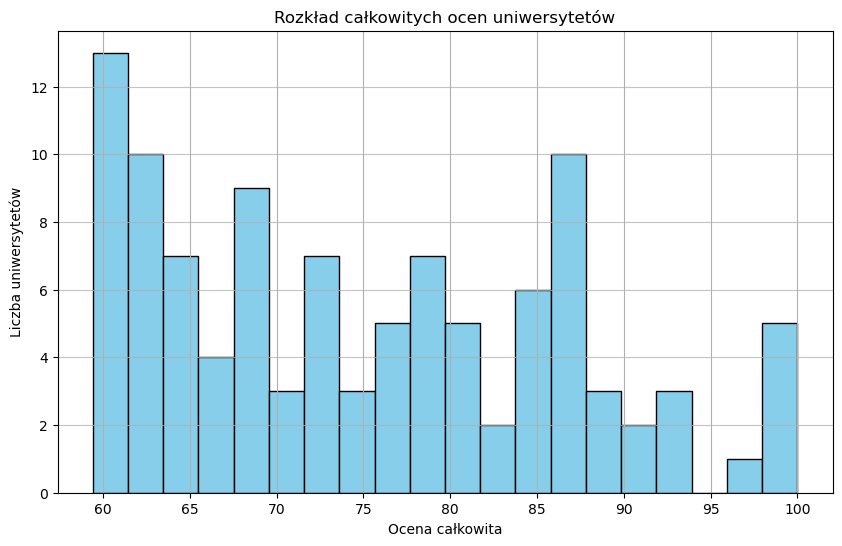

In [87]:
import matplotlib.pyplot as plt

# Histogram dla rozkładu 'overall_score'
plt.figure(figsize=(10, 6))
universities_data['overall_score'].hist(bins=20, edgecolor='black', color='skyblue')
plt.title("Rozkład całkowitych ocen uniwersytetów")
plt.xlabel("Ocena całkowita")
plt.ylabel("Liczba uniwersytetów")
plt.grid(axis='y', alpha=0.75)
plt.show()


#### Wykres słupkowy: Top 10 uniwersytetów według oceny

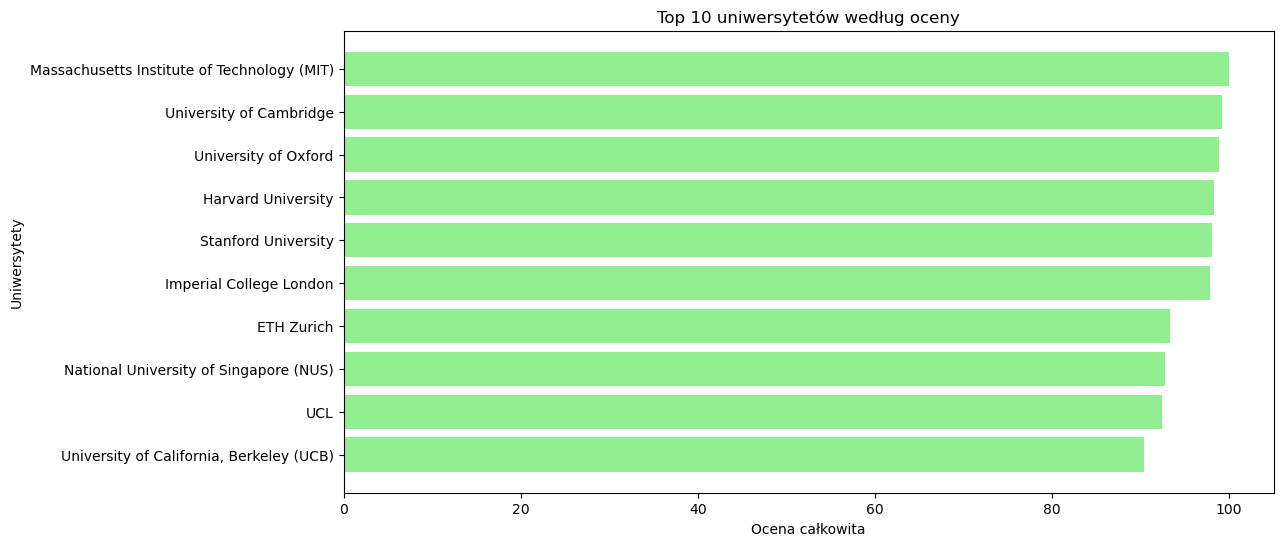

In [89]:
# Wybór Top 10 uniwersytetów
top_10 = universities_data.nlargest(10, 'overall_score')

# Wykres słupkowy
plt.figure(figsize=(12, 6))
plt.barh(top_10['university'], top_10['overall_score'], color='lightgreen')
plt.title("Top 10 uniwersytetów według oceny")
plt.xlabel("Ocena całkowita")
plt.ylabel("Uniwersytety")
plt.gca().invert_yaxis()  # Odwrócenie osi Y, aby najlepszy uniwersytet był na górze
plt.show()


#### Wykres kołowy: Podział uniwersytetów na kategorie oceny

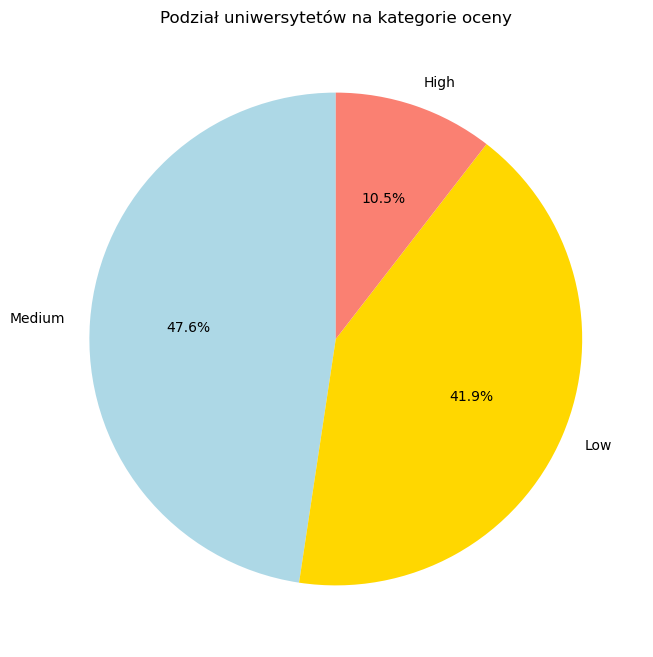

In [91]:
# Kategoryzacja na podstawie 'score_category' (utworzona wcześniej)
score_categories = universities_data['score_category'].value_counts()

# Wykres kołowy
plt.figure(figsize=(8, 8))
plt.pie(score_categories, labels=score_categories.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'salmon'])
plt.title("Podział uniwersytetów na kategorie oceny")
plt.show()

plt.pie():

# Funkcja rysująca wykres kołowy.
    # score_categories:

        # Dane wejściowe. Powinno to być iterable (np. lista, Pandas Series), które zawiera wartości odpowiadające wielkości sektorów wykresu.
        # Reprezentuje podział danych między różne kategorie (np. liczba uniwersytetów w różnych przedziałach ocen).

# labels=score_categories.index:

    # Parametr labels określa etykiety wyświetlane przy poszczególnych sektorach.
        # W tym przypadku score_categories.index to indeks danych (np. nazwy kategorii, takie jak "A", "B", "C").

# autopct='%1.1f%%':

    # Dodaje automatyczne wyświetlanie wartości procentowych na sektorach wykresu.
    # Formatowanie '%1.1f%%' oznacza:
        # 1.1 – zaokrąglenie do jednego miejsca po przecinku.
        # %% – symbol procentu.

    # Główne cechy autopct:
        # Automatyczne obliczanie procentów:
            # Matplotlib automatycznie przelicza wartości dostarczone w danych (score_categories) na procenty.
            # Każda wartość jest dzielona przez sumę wszystkich wartości i mnożona przez 100, aby uzyskać procentowy udział.

        # Wyświetlanie wyników:
            # autopct kontroluje sposób, w jaki wynik jest wyświetlany na sektorach wykresu.

    # Formaty używane w autopct:
        # 1. '%1.1f%%':
            # Jest to najczęściej stosowany format, który oznacza:
                # 1.1:
                    # 1 to minimalna liczba cyfr przed kropką dziesiętną.
                    # .1 oznacza, że wynik będzie zaokrąglony do jednego miejsca po przecinku.
                # %%:
                    # Podwójny procent (%%) jest wymagany, aby wyświetlić znak % (escape character w Pythonie).
            # Przykład:
                # Wartość 25% zostanie wyświetlona jako: 25.0%.

        # 2. '%1.0f%%':
            # Wynik jest zaokrąglany do zeru miejsc po przecinku (tylko liczby całkowite).
            # Przykład:
                # Wartość 25% zostanie wyświetlona jako: 25%.

        # 3. '%0.2f%%':
            # Wynik jest zaokrąglany do dwóch miejsc po przecinku.
            # Przykład:
                # Wartość 25% zostanie wyświetlona jako: 25.00%.

# startangle=90:

    # Ustawia początkowy kąt, od którego zaczyna się rysowanie wykresu.
        # 90 oznacza, że pierwszy sektor zacznie się od godziny 12 na zegarze.

# colors=['lightblue', 'gold', 'salmon']:

    # Lista kolorów przypisanych poszczególnym sektorom.
        # Kolory są podane w kolejności odpowiadającej kolejności wartości w score_categories.

#### Scatter plot: Związek między liczbą cytowań a wynikiem ogólnym

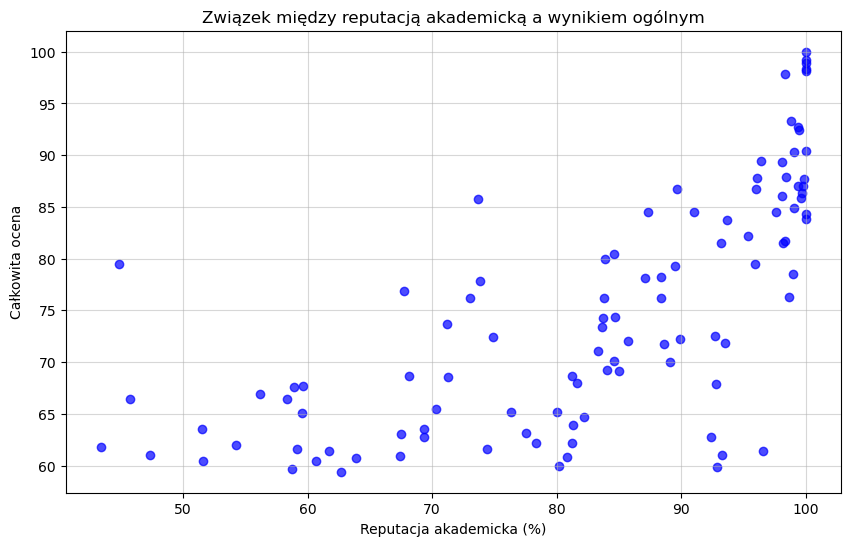

In [95]:
# Scatter plot: academic_reputation vs. overall_score
plt.figure(figsize=(10, 6))
plt.scatter(universities_data['academic_reputation'], universities_data['overall_score'], alpha=0.7, color='blue')
plt.title("Związek między reputacją akademicką a wynikiem ogólnym")
plt.xlabel("Reputacja akademicka (%)")
plt.ylabel("Całkowita ocena")
plt.grid(alpha=0.5)
plt.show()


#### Wykres liniowy: Trend w wynikach międzynarodowego środowiska

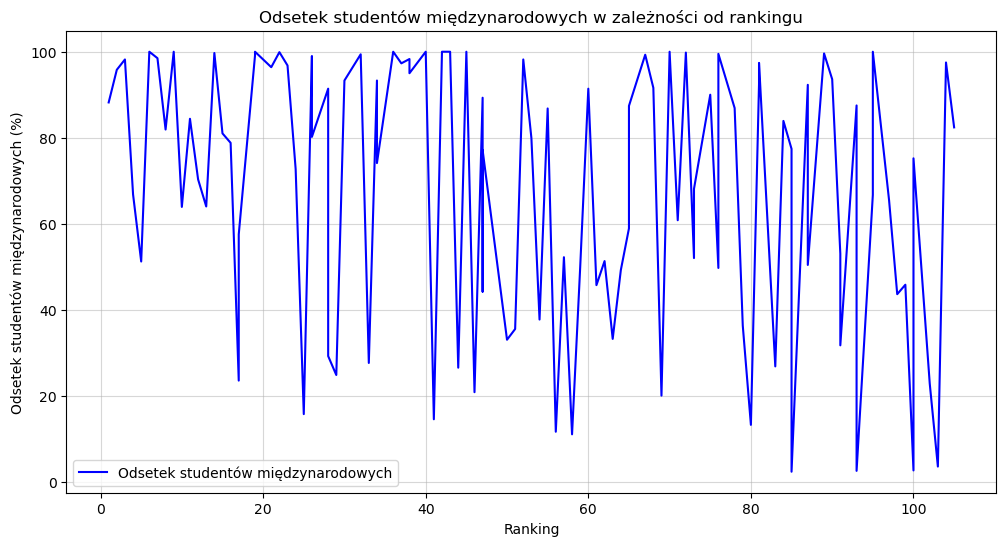

In [97]:
# Sortowanie danych wg rank i wykres liniowy
sorted_data = universities_data.sort_values(by='rank')
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['rank'], sorted_data['international_students_ratio'], label='Odsetek studentów międzynarodowych', color='blue')
plt.title("Odsetek studentów międzynarodowych w zależności od rankingu")
plt.xlabel("Ranking")
plt.ylabel("Odsetek studentów międzynarodowych (%)")
plt.grid(alpha=0.5)
plt.legend()
plt.show()


Co widzimy na wykresie:
Oś X (Ranking):

Przedstawia ranking uczelni (od najwyższego, np. 1, do najniższego w zestawieniu).
Im dalej na prawo, tym gorsza pozycja uczelni w rankingu.
Oś Y (Odsetek studentów międzynarodowych):

Wartości wskazują, jaki procent studentów na danej uczelni pochodzi spoza kraju, w którym znajduje się uczelnia.
Wartości wahają się od 0% do 100%.
Linia na wykresie:

Linia pokazuje, jak zmienia się odsetek studentów międzynarodowych w zależności od rankingu.
Widzimy wiele fluktuacji (nagłe wzrosty i spadki), co sugeruje dużą zmienność odsetka studentów międzynarodowych w różnych uczelniach, niezależnie od pozycji w rankingu.
Kluczowe obserwacje:
Brak wyraźnego trendu:

Na wykresie nie widać wyraźnej zależności między rankingiem uczelni a odsetkiem studentów międzynarodowych.
Zarówno uczelnie z wysokimi pozycjami w rankingu, jak i te z niższymi miejscami, mają odsetki w szerokim zakresie od 0% do 100%.
Wysoka zmienność:

Niektóre uczelnie mają blisko 100% studentów międzynarodowych, podczas gdy inne (niezależnie od rankingu) mają ich bardzo niewiele.
To może sugerować, że odsetek studentów międzynarodowych bardziej zależy od innych czynników, takich jak lokalizacja uczelni, jej specjalizacja czy polityka przyjmowania studentów, niż od samej pozycji w rankingu.
Punkty ekstremalne:

Widać uczelnie, które mają blisko 100% studentów międzynarodowych, co może sugerować ich silną globalną pozycję lub specjalizację w przyciąganiu studentów spoza kraju.
Z drugiej strony, są uczelnie z bliskim zeru odsetkiem studentów międzynarodowych, co może wynikać z regionalnego charakteru uczelni.
Wnioski:
Brak korelacji:

Ranking uczelni nie wydaje się istotnie powiązany z odsetkiem studentów międzynarodowych.
Oznacza to, że zarówno najlepsze, jak i słabsze uczelnie mogą mieć różnorodny udział studentów spoza kraju.
Różnice zależne od polityki uczelni:

Uczelnie przyciągające więcej studentów międzynarodowych mogą mieć bardziej otwartą politykę rekrutacyjną, oferować programy międzynarodowe lub być zlokalizowane w krajach atrakcyjnych dla studentów zagranicznych.
Dalsza analiza:
Aby lepiej zrozumieć wyniki:

Porównanie z innymi wskaźnikami:

Zbadaj, czy odsetek studentów międzynarodowych jest powiązany np. z całkowitym wynikiem (overall_score) lub reputacją akademicką.
Analiza regionalna:

Sprawdź, czy uczelnie w określonych regionach (np. Europa, Azja) mają większy lub mniejszy udział studentów międzynarodowych.
Grupowanie uczelni:

Podziel uczelnie na grupy według rankingu (np. Top 10, 11-50, 51-100) i oblicz średni odsetek studentów międzynarodowych w każdej grupie.

Aby sprawdzić, czy inne wskaźniki wpływają na odsetek studentów międzynarodowych, można przeprowadzić analizę zależności między miarą international_students_ratio a innymi zmiennymi, takimi jak:

overall_score (całkowita ocena uczelni),
academic_reputation (reputacja akademicka),
employer_reputation (reputacja wśród pracodawców),
faculty_student_ratio (stosunek studentów do kadry akademickiej),
citations_per_faculty (liczba cytowań przypadających na jednego pracownika naukowego).

#### Analiza zależności

Scatter plot: Związek między odsetkiem studentów międzynarodowych a innym wskaźnikiem
Oto przykładowy kod do analizy zależności między miarą international_students_ratio a innymi wskaźnikami:

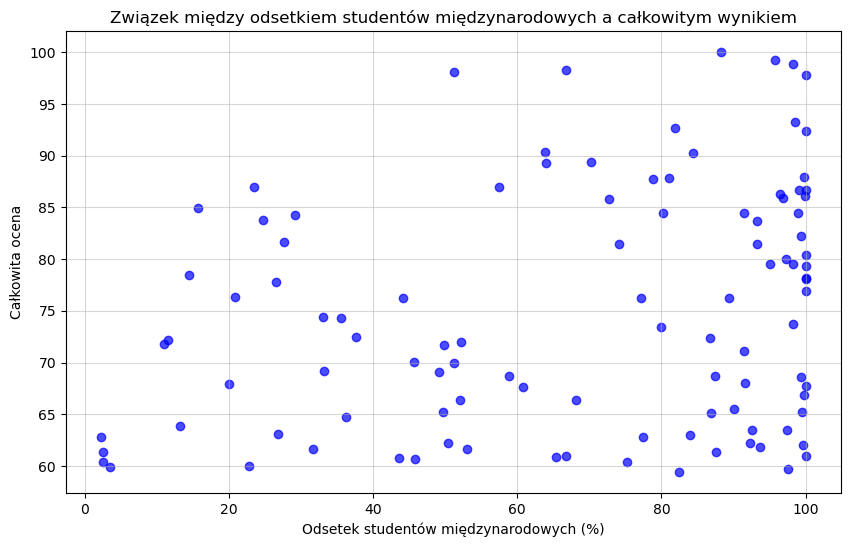

In [99]:
# Scatter plot: international_students_ratio vs. overall_score
plt.figure(figsize=(10, 6))
plt.scatter(universities_data['international_students_ratio'], universities_data['overall_score'], alpha=0.7, color='blue')
plt.title("Związek między odsetkiem studentów międzynarodowych a całkowitym wynikiem")
plt.xlabel("Odsetek studentów międzynarodowych (%)")
plt.ylabel("Całkowita ocena")
plt.grid(alpha=0.5)
plt.show()


#### Korelacja: Jak silny jest związek między wskaźnikami?

Korelacja oblicza stopień zależności między zmiennymi. Wartość:

bliska 1 oznacza silną zależność dodatnią,
bliska -1 oznacza silną zależność ujemną,
bliska 0 oznacza brak zależności.

In [101]:
# Korelacja między wybranymi wskaźnikami
correlation_matrix = universities_data[['international_students_ratio', 'overall_score', 'academic_reputation', 'employer_reputation', 'faculty_student_ratio', 'citations_per_faculty']].corr()

# Wyświetlenie macierzy korelacji
print("\nMacierz korelacji:")
print(correlation_matrix)

# Korelacja z odsetkiem studentów międzynarodowych
print("\nKorelacja z 'international_students_ratio':")
print(correlation_matrix['international_students_ratio'])



Macierz korelacji:
                              international_students_ratio  overall_score  \
international_students_ratio                      1.000000       0.266283   
overall_score                                     0.266283       1.000000   
academic_reputation                              -0.165705       0.695954   
employer_reputation                              -0.158794       0.519354   
faculty_student_ratio                            -0.005027       0.416732   
citations_per_faculty                             0.158199       0.508857   

                              academic_reputation  employer_reputation  \
international_students_ratio            -0.165705            -0.158794   
overall_score                            0.695954             0.519354   
academic_reputation                      1.000000             0.522790   
employer_reputation                      0.522790             1.000000   
faculty_student_ratio                    0.212274             0.296268

#### Wizualizacja korelacji: Heatmapa

Dla lepszego zrozumienia korelacji między wskaźnikami można narysować heatmapę.

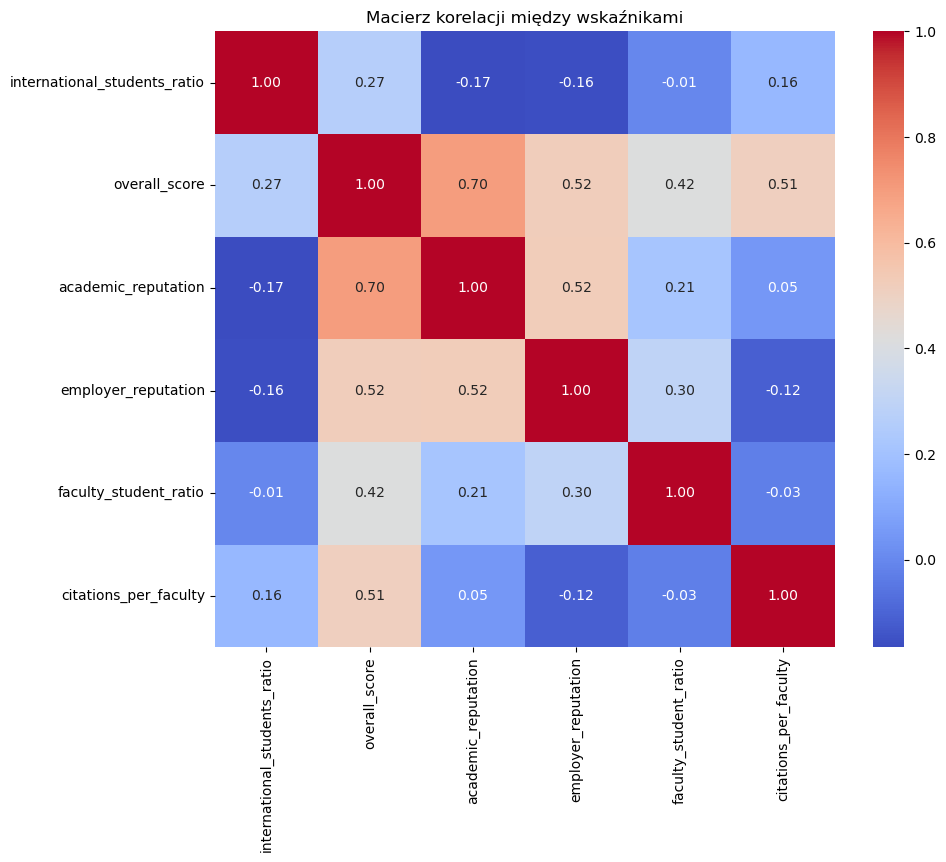

In [103]:
import seaborn as sns

# Heatmapa korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji między wskaźnikami")
plt.show()

# 1. sns.heatmap()
# To funkcja z biblioteki seaborn, która generuje mapę cieplną. Mapa cieplna to wizualizacja danych numerycznych, gdzie wartości są przedstawiane w postaci kolorów.

# 2. correlation_matrix
    # Jest to argument wejściowy funkcji sns.heatmap.
    # W tym przypadku odnosi się do macierzy korelacji (najczęściej typu Pandas DataFrame lub NumPy array), która pokazuje współczynniki korelacji pomiędzy różnymi zmiennymi.
    # Współczynniki korelacji przyjmują wartości od -1 (silna korelacja negatywna) do 1 (silna korelacja pozytywna).
# 3. annot=True
    # Parametr, który określa, czy na mapie cieplnej mają być wyświetlane wartości numeryczne.
    # Jeśli True, wartości z macierzy korelacji zostaną umieszczone na odpowiednich komórkach mapy cieplnej.
# 4. cmap="coolwarm"
    # Parametr określający mapę kolorów (ang. colormap), która zostanie użyta do wizualizacji danych.
    # "coolwarm" to predefiniowana mapa kolorów, która przechodzi od chłodnych kolorów (niebieski) do ciepłych (czerwony), dzięki czemu dobrze nadaje się do przedstawiania zakresu wartości od ujemnych do dodatnich (np. korelacji).
# 5. fmt=".2f"
    # Parametr określający format wartości wyświetlanych na mapie cieplnej.
    # Wartość ".2f" oznacza, że liczby będą zaokrąglone do dwóch miejsc po przecinku.

#### Możliwe wyniki i ich interpretacja:

Silna korelacja dodatnia z overall_score:

Oznacza, że uczelnie z wyższym wynikiem ogólnym mają również większy odsetek studentów międzynarodowych.
Wskazuje, że międzynarodowy charakter uczelni może być czynnikiem wpływającym na jej ogólny wynik.
Silna korelacja dodatnia z academic_reputation lub employer_reputation:

Uczelnie o wysokiej reputacji mogą przyciągać więcej studentów międzynarodowych, ponieważ są bardziej znane na świecie.
Brak lub niska korelacja z citations_per_faculty:

Liczba cytowań może nie być istotnym czynnikiem dla studentów międzynarodowych przy wyborze uczelni.
Negatywna korelacja z faculty_student_ratio:

Uczelnie o niskim stosunku studentów do kadry akademickiej (co wskazuje na lepszą jakość edukacji) mogą mieć większy odsetek studentów międzynarodowych.

#### Dalsze kroki:

Analiza regresji: Można przeprowadzić analizę regresji, aby dokładnie ocenić wpływ różnych wskaźników na miarę international_students_ratio.
Grupowanie uczelni: Można podzielić uczelnie na grupy według international_students_ratio i zobaczyć, jakie inne wskaźniki różnią się między grupami.